## Time Series Analysis in Python: Components of Time Series Data #
- A Time Series is a sequence of data points recorded at specific, usually equal, time intervals (e.g., daily stock prices, monthly sales, or annual GDP)
- About dataset: Tesla opening and closing stock share prices from 2019 to 2022 (Source: [text](https://finance.yahoo.com/quote/TSLA.))

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#Import dataset
data=pd.read_csv("TSLA.csv")
#View dataframe
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


### **Visualising/Exploring Time Series Data**
- Visualising the "Close" shares over the years
- Univariate time-series analysis

In [11]:
#Select columns of interest
data2=data[["Date","Close"]]
#Check for missing information
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [13]:
#Convert the Date to a dateformat 
data2["Date"]=pd.to_datetime(data2["Date"])
#view result
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_4975/485013970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Date"]=pd.to_datetime(data2["Date"])


In [14]:
data2

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [15]:
data2.columns

Index(['Date', 'Close'], dtype='object')

### **Components of a Time-Series**


- **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).


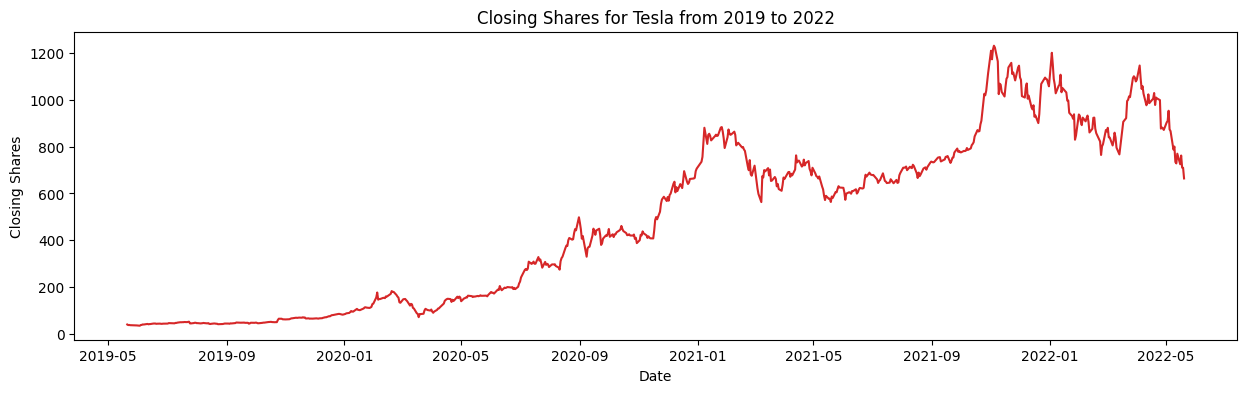

In [17]:
#Display the trend of the close shares
def plot_df(data2, x, y, title="", xlabel='Date', ylabel='Closing Shares', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(data2, x=data2['Date'], y=data2['Close'], title='Closing Shares for Tesla from 2019 to 2022')

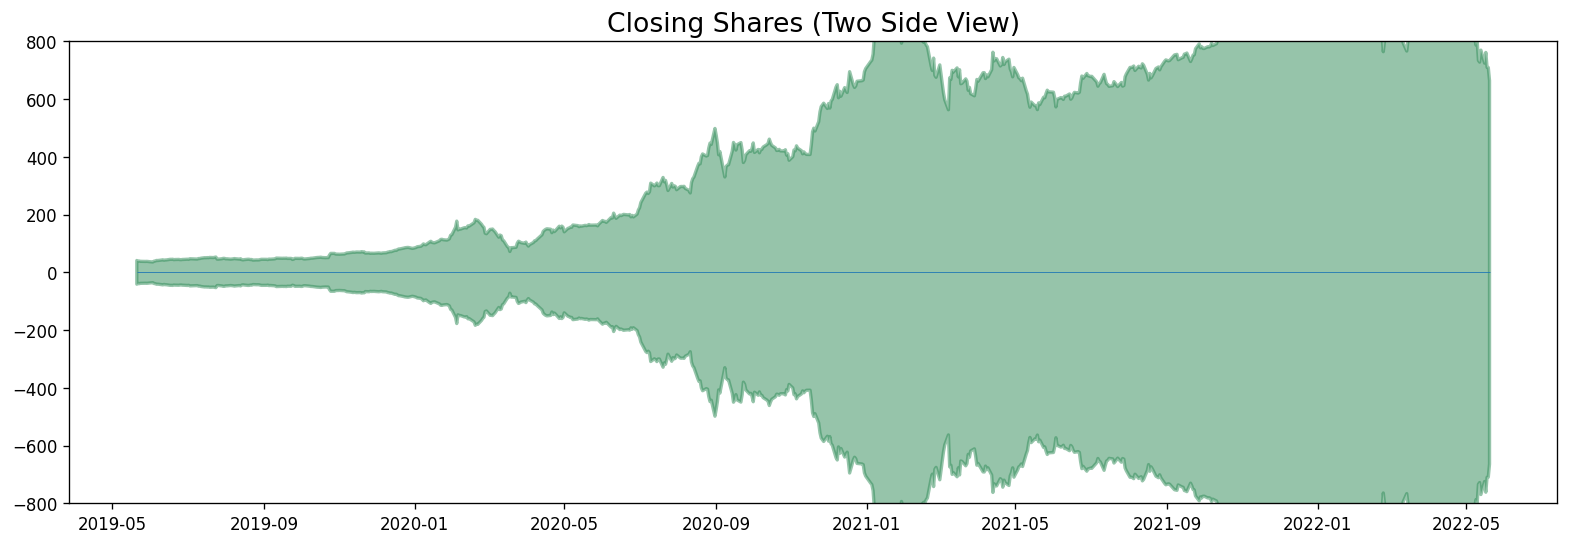

In [18]:
#Showing a two-side view of the trend
x = data2['Date'].values
y1 = data2['Close'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Closing Shares (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(data2['Date']), xmax=np.max(data2['Date']), linewidth=.5)
plt.show()

- The trend is positive or referred to as an uptrend.

**Seasonality** 
- is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.
- This can be observed by decomposing the time series in to the individual components i.e. trend, season,  residual

### **Decomposition of a Time Series** 

- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.
- The seasonal_decompose in statsmodels implements this conveniently.

In [19]:
#Libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse #Helps with date written in varying date formats

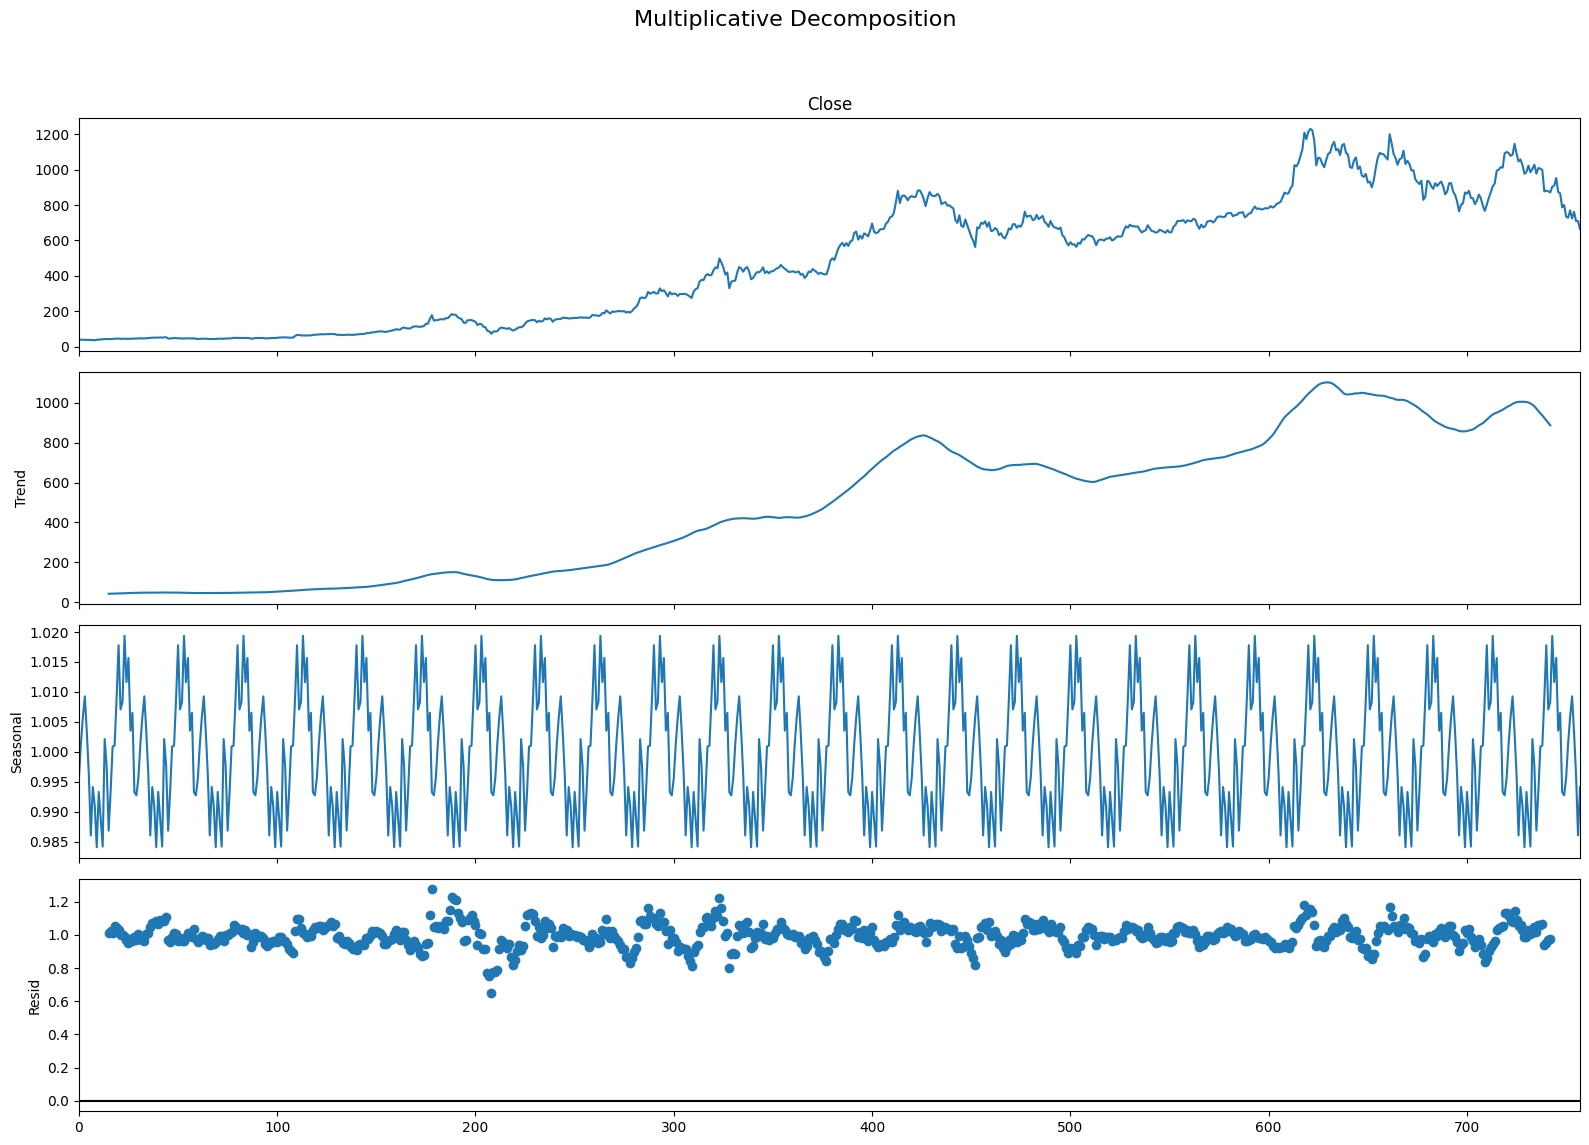

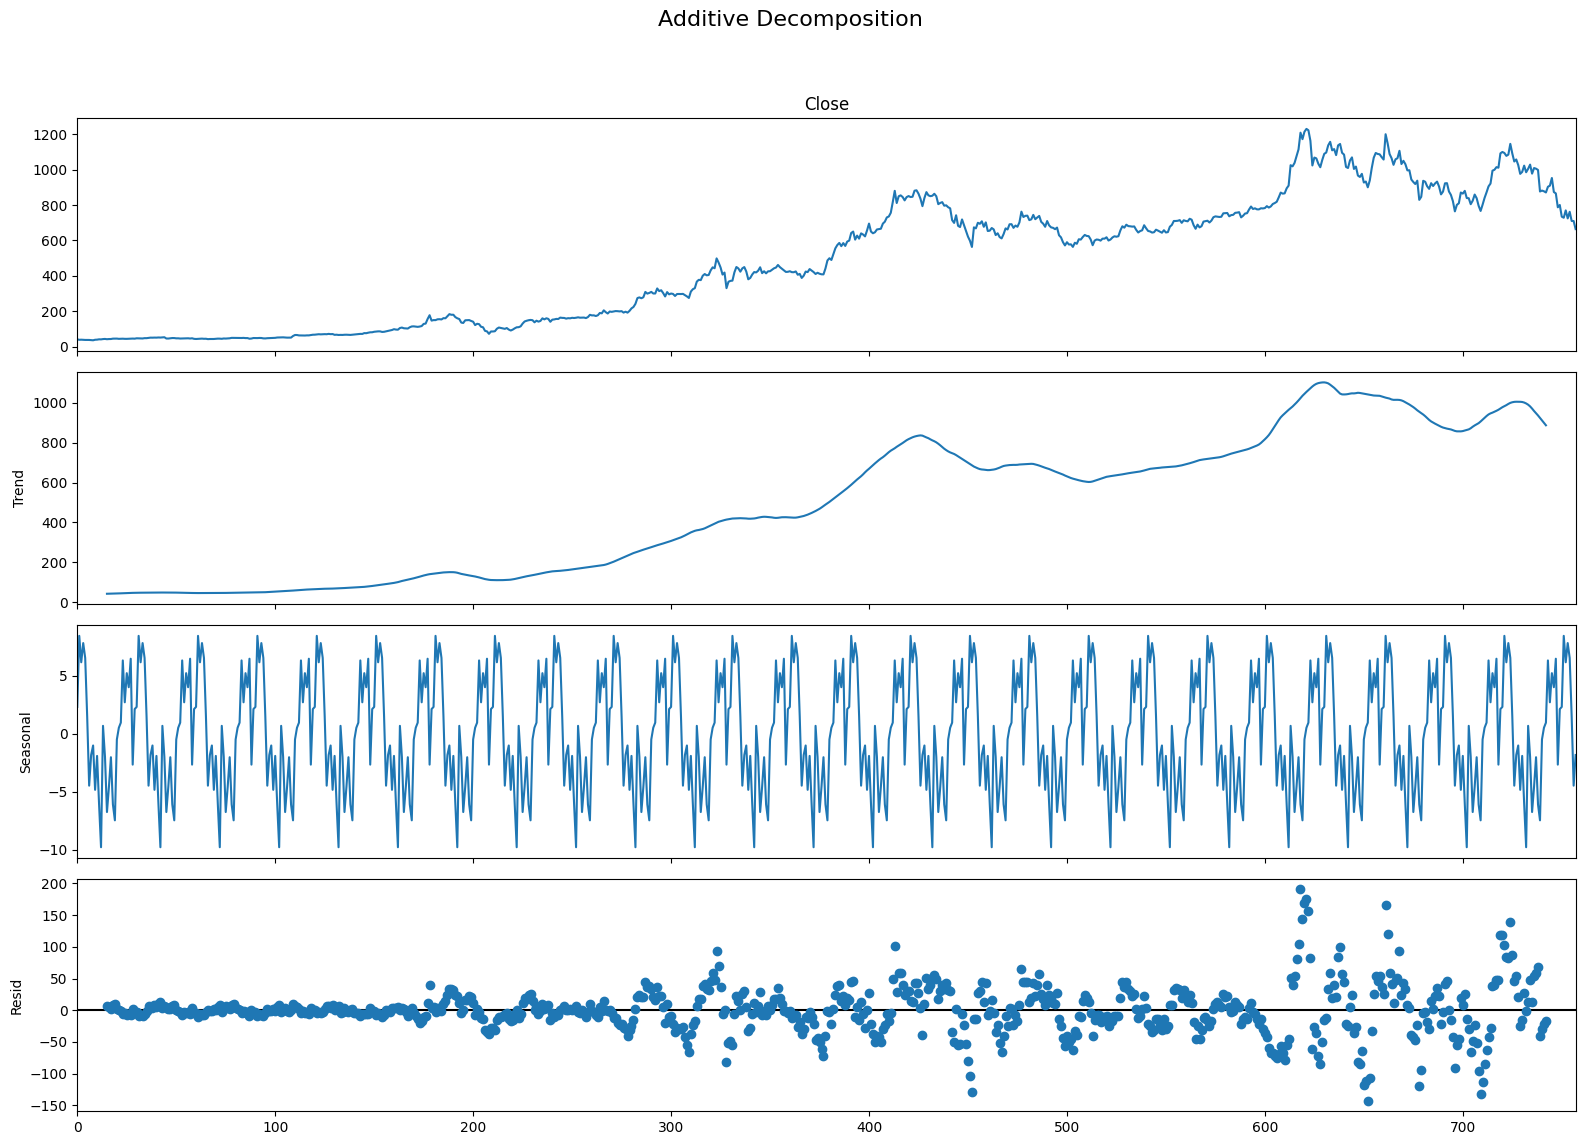

In [ ]:
#Decompose the data using both techniches (Additive and Multiplicative) to the most suitable
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data2['Close'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(data2['Close'], model='additive', period=30) #period shows price movement every 30 days

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Four plots are generated:**
- Original Time Series: The first subplot displays the entire original time series data. It shows the raw and unprocessed data over time.
-  Trend Component: The second subplot shows the long-term movement or trend in the data. It highlights the overall direction (upward, downward, or stable) over time, in this case an upward trend
-  Seasonal Component: Seasonality in time series data shows regular patterns that repeat over time. These patterns repeat at regular times, like every day, month, or year.
- Residual Component: The final subplot displays the residuals. They represent the random noise or variability left after removing the trend and seasonality from the original data.
- Looking at the additive decomposition closely, it has some pattern left over in the residuals plot. 
- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series data.

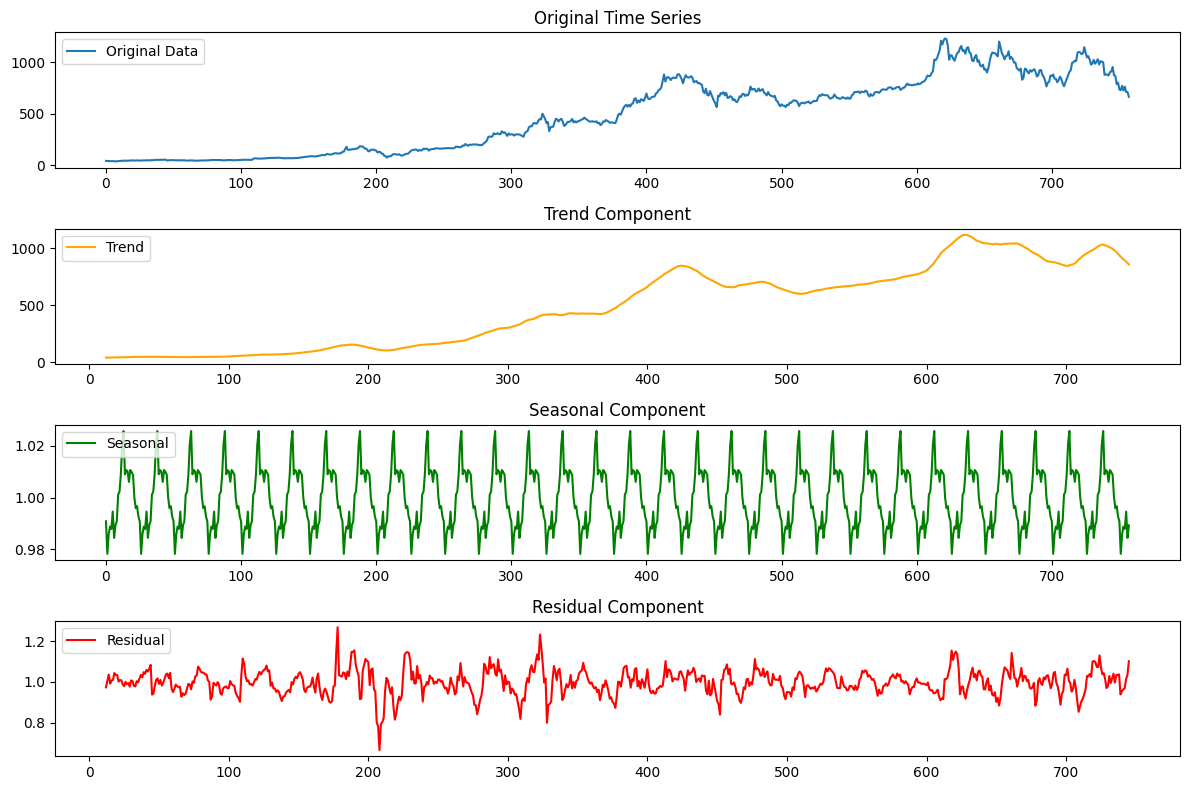

In [24]:
#OR use just one decomposing model
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(data2['Close'], model='multiplicative', period=25) #price every 25 days

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


#Plot the components
# Plotting the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data2['Close'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


- However,  if the seasonal variations seem to grow as the data increases, you’re looking at a multiplicative scenario. If not, stick to additive.

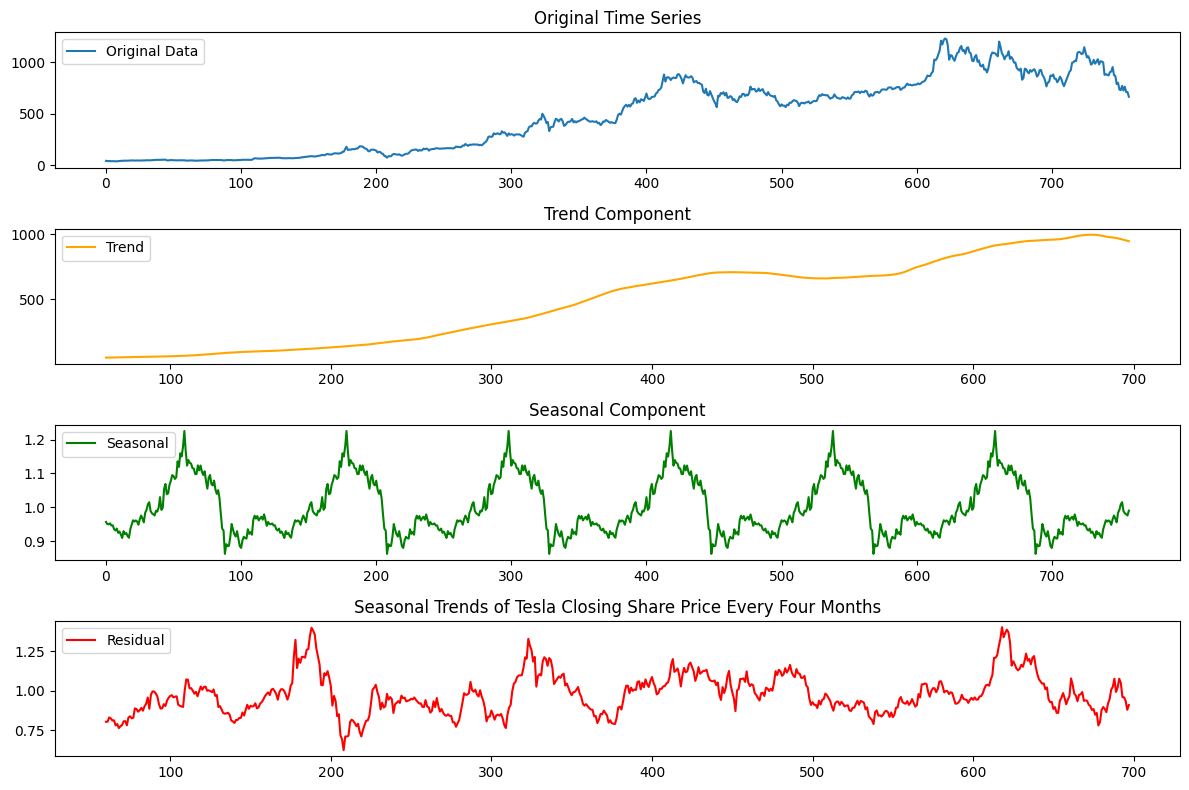

In [29]:
#Check the closing prices every four months (120 days)-This can count as a cycle (multiple seasons)
# Decompose the time series
decomposition = seasonal_decompose(data2['Close'], model='multiplicative', period=120) #price every 120 days

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


#Plot the components
# Plotting the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data2['Close'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.title("Seasonal Trends of Tesla Closing Share Price Every Four Months")
plt.show()


### **Advanced Techniques for Time Series Decomposition**
**Decomposing Cyclical Components**

**Hodrick-Prescott Filter**
- The Hodrick-Prescott (HP) filter is often used in economics to separate the trend from the cyclical components in time series data.
- It’s particularly handy for financial time series where you want to smooth out long-term trends but still capture short-term fluctuations.

In [25]:
#library
from statsmodels.tsa.filters.hp_filter import hpfilter

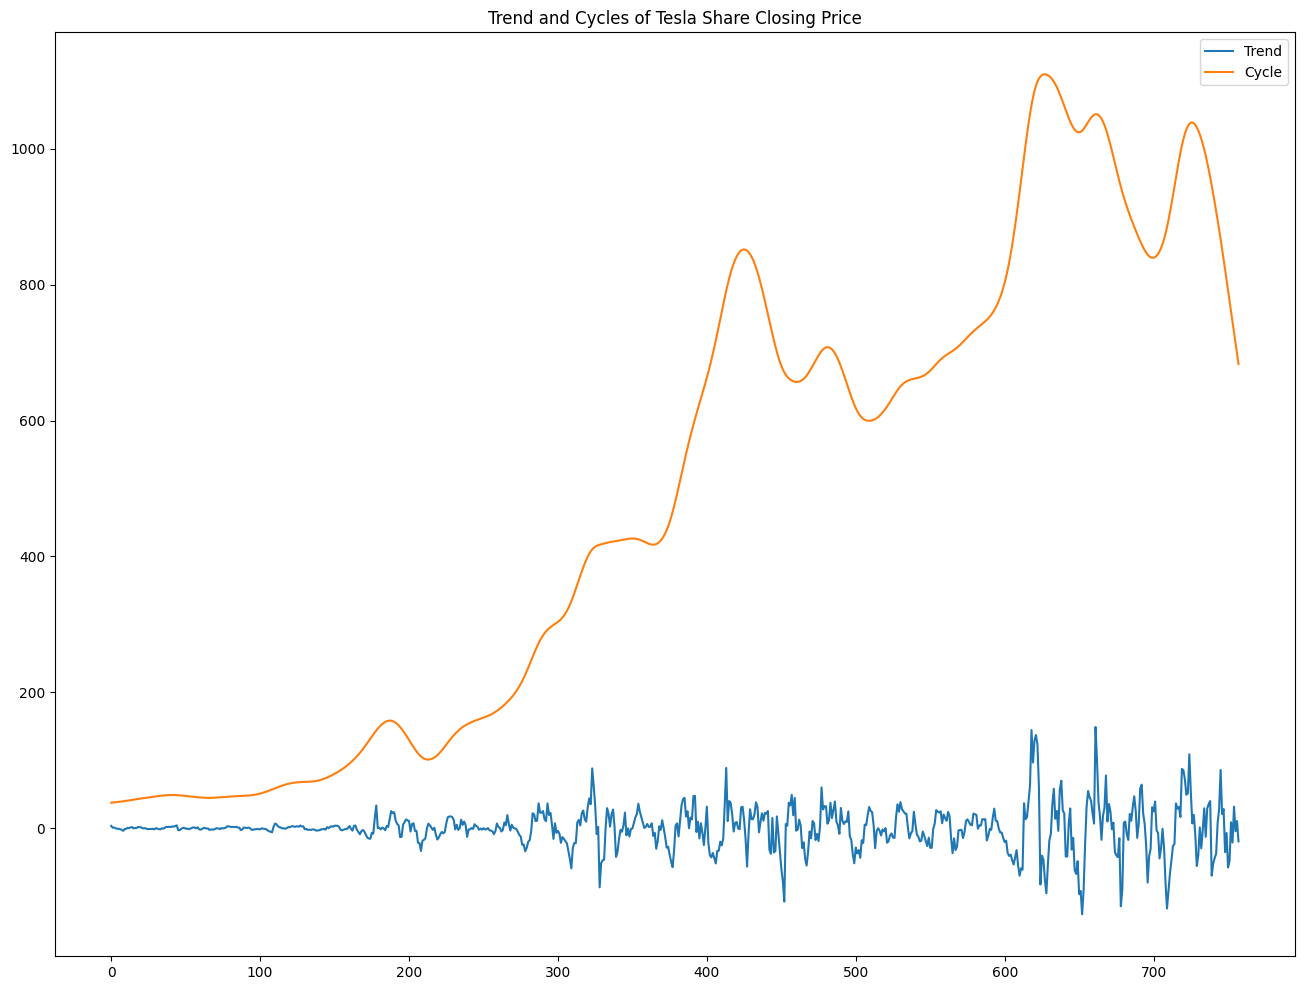

In [28]:
# Apply the Hodrick-Prescott filter
trend, cycle = hpfilter(data2['Close'], lamb=1600)  # 'lamb' is the smoothing parameter which can be changed
# Plot the trend and cycle components
plt.plot(trend, label='Trend')
plt.plot(cycle, label='Cycle')
plt.legend()
plt.title('Trend and Cycles of Tesla Share Closing Price')
plt.show()